In [ ]:
%load_ext autoreload
%autoreload 2

<div class="main-title">
<h1>Geospatial data</h1>
<p>Introduction<p>
</div>

## Before we begin

We encorage you to check out the tutorial by Joris Van den Bossche  
[Introduction to geospatial data analysis with GeoPandas](https://github.com/jorisvandenbossche/geopandas-tutorial)  

<div class="center-content">
    <a href="https://t.ly/agtgJ">https://t.ly/agtgJ</a>
    <img src="assets/geospatial_intro.png" style="height: 300px; width: 300px; margin: auto;"/>
</div>

## What is this part for?

- introduce a couple of basic concepts
- build a "vocabulary"
- understand SRAI APIs
- mostly used by SRAI under the hood
- pre/post processing, data preparation, analysis and visualization

## SRAI utilizes GeoPandas

- one of its main under-the-hood libraries
- SRAI builds on-top of GeoPandas
- most functions either accept as input, return or otherwise work with GeoDataFrames
- easy to use existing GeoPandas functionalities
  - pre-processing, post-processing, data-preparation, visualization etc.

## What is GeoPandas

- open source
- tries to make working with geospatial data in python easier
- extends pandas to allow spatial operations on geometric types
- geometric operations are performed by shapely
- fiona for file access and matplotlib for plotting

## What are GeoDataFrames

- an extension of Pandas DataFrames
- consist of:
  - **geometries**: the column where spatial objects are stored
  - **properties**: the rest of the columns, describing the geometries

## Let's load some data

GeoPandas implements reading from a number of sources:
- files in formats supported by fiona
- PostGIS databases
- Feather and Parquet files

We'll be using a shapefile zip with countries from [Natural Earth](https://www.naturalearthdata.com/downloads/110m-cultural-vectors/110m-admin-0-countries/)

## Read the shapefile

In [1]:
import geopandas as gpd
countries = gpd.read_file("data/ne_110m_admin_0_countries.zip")
countries = countries[["ISO_A3", "NAME", "CONTINENT", "POP_EST", "geometry"]]
countries.head(5)

,ISO_A3,NAME,CONTINENT,POP_EST,geometry
0,FJI,Fiji,Oceania,889953.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,TZA,Tanzania,Africa,58005463.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,ESH,W. Sahara,Africa,603253.0,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,CAN,Canada,North America,37589262.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,USA,United States of America,North America,328239523.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


## Visualize the geometries

We can use:
- `.plot()` to plot the geometries on a static map (matplotlib)
- `.explore()` to view them on an interactive map (Folium / Leaflet.js)

.plot()

<Axes: >

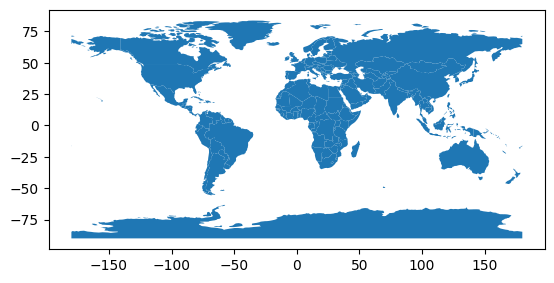

In [29]:
countries.plot()

.explore()

In [37]:
countries.explore()

## We are working with a DataFrame

In [13]:
type(countries)

geopandas.geodataframe.GeoDataFrame

In [14]:
import pandas as pd
isinstance(countries, pd.DataFrame)

True

In [15]:
countries.columns

Index(['ISO_A3', 'NAME', 'CONTINENT', 'POP_EST', 'geometry'], dtype='object')

## Pandas operations

In [31]:
countries['POP_EST'].mean()

43243457.74745763

In [32]:
countries['CONTINENT'].value_counts()

CONTINENT
Africa                     51
Asia                       47
Europe                     39
North America              18
South America              13
Oceania                     7
Seven seas (open ocean)     1
Antarctica                  1
Name: count, dtype: int64

## The geometry column

In [33]:
type(countries["POP_EST"]), type(countries.geometry)

(pandas.core.series.Series, geopandas.geoseries.GeoSeries)

In [34]:
countries.geometry

0      MULTIPOLYGON (((180.00000 -16.06713, 180.00000...
1      POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...
2      POLYGON ((-8.66559 27.65643, -8.66512 27.58948...
3      MULTIPOLYGON (((-122.84000 49.00000, -122.9742...
4      MULTIPOLYGON (((-122.84000 49.00000, -120.0000...
                             ...                        
172    POLYGON ((18.82982 45.90887, 18.82984 45.90888...
173    POLYGON ((20.07070 42.58863, 19.80161 42.50009...
174    POLYGON ((20.59025 41.85541, 20.52295 42.21787...
175    POLYGON ((-61.68000 10.76000, -61.10500 10.890...
176    POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...
Name: geometry, Length: 177, dtype: geometry

## Calculating the area

In [10]:
countries.geometry.area

/tmp/ipykernel_7576/3077649407.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries.geometry.area


0         1.639511
1        76.301964
2         8.603984
3      1712.995228
4      1122.281921
          ...     
172       8.604719
173       1.479321
174       1.231641
175       0.639000
176      51.196106
Length: 177, dtype: float64

In [35]:
countries.geometry.area.mean()

/tmp/ipykernel_7576/2817025040.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries.geometry.area.mean()


121.45192648583466

## Using GeoDataFrames in SRAI

In [43]:
poland_gdf = countries[countries["NAME"] == "Poland"]
poland_gdf

,ISO_A3,NAME,CONTINENT,POP_EST,geometry
113,POL,Poland,Europe,37970874.0,"POLYGON ((23.48413 53.91250, 23.52754 53.47012..."


In [44]:
from srai.regionalizers import AdministrativeBoundaryRegionalizer

regionalizer = AdministrativeBoundaryRegionalizer(admin_level=4)
regions_gdf = regionalizer.transform(poland_gdf)
regions_gdf.head(5)

Loading boundaries: 40it [00:01, 22.44it/s]
/home/swozniak/projects/srai-tutorial/env/lib/python3.10/site-packages/topojson/core/dedup.py:107: RuntimeWarning: invalid value encountered in cast
  data["bookkeeping_shared_arcs"] = array_bk_sarcs.astype(np.int64).tolist()
/home/swozniak/projects/srai-tutorial/env/lib/python3.10/site-packages/srai/regionalizers/administrative_boundary_regionalizer.py:167: FutureWarning: `unary_union` returned None due to all-None GeoSeries. In future, `unary_union` will return 'GEOMETRYCOLLECTION EMPTY' instead.
  ].geometry.unary_union


,geometry
region_id,
Region of Prešov,"MULTIPOLYGON (((20.32066 49.39959, 20.32162 49..."
Region of Žilina,"MULTIPOLYGON (((18.83549 49.51554, 18.83875 49..."
Lesser Poland Voivodeship,"POLYGON ((19.95365 50.50579, 19.95498 50.50660..."
Subcarpathian Voivodeship,"POLYGON ((21.21125 50.35504, 21.21493 50.35558..."
Silesian Voivodeship,"POLYGON ((18.03507 50.06624, 18.03578 50.06673..."


In [46]:
regions_gdf.explore()

## Let's go deeper - Shapely objects

In [49]:
type(regions_gdf.iloc[2].geometry)

shapely.geometry.polygon.Polygon

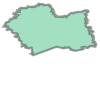

In [50]:
region = regions_gdf.iloc[2].geometry
region

In [51]:
region.area

1.8662664985355808

In [52]:
region.bounds

(19.0831232, 49.21712535256923, 21.4217327, 50.5204879)

In [1]:
from shapely.geometry import LineString
bounds = region.bounds
line = LineString(
    [(bounds[0], bounds[1]),
    (bounds[2], bounds[3]),]
)
line

NameError: name 'region' is not defined

<Axes: >

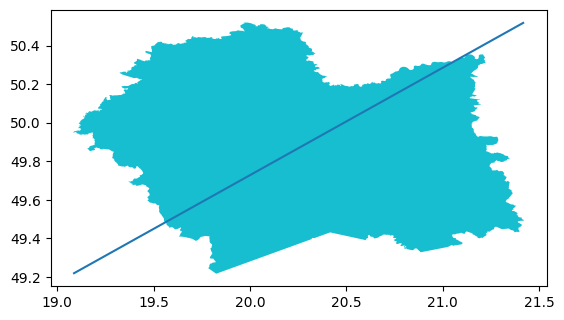

In [57]:
gpd.GeoSeries([line, region]).plot(cmap='tab10')

In [ ]:
line.within(region)

In [ ]:
line.intersects(region)

## Geospatial indexes

H3 is a geospatial indexing system using a hexagonal grid that can be (approximately) subdivided into finer and finer hexagonal grids

In [ ]:
from srai.regionalizers import geocode_to_region_gdf, H3Regionalizer
from utils import CB_SAFE_PALLETE

prague_gdf = geocode_to_region_gdf("Prague, Czech Republic")
regionized = H3Regionalizer(resolution=7).transform(prague_gdf)
m = prague_gdf.explore(color=CB_SAFE_PALLETE[1])
regionized.explore(m=m, color=CB_SAFE_PALLETE[0])

## Spatial operations on GeoDataFrames

### Spatial joins

In [ ]:
from srai.loaders import OSMOnlineLoader

loader = OSMOnlineLoader()
prague_bikes = loader.load(prague_gdf, {"amenity": "bicycle_rental"})
prague_bikes

In [ ]:
regionized.sjoin(prague_bikes)

### Buffering

In [ ]:
ax = prague_gdf.to_crs(epsg=5070).buffer(1000).to_crs(epsg=4326).plot()
prague_gdf.plot(ax=ax, color="red")